# Plots for Section 2-3

## 1. Plot for comparison of cluster size

In [1]:
from heterogeneous_model import *
from sparseness_expansion import *

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')

In [3]:
from tqdm import tqdm

In [4]:
N=100
H=2100
P=10
K=10
dstim=0.1
dcont=0.1
th=0.8

p3=0.1
#rem = 1-p3
#p1 = rem/2
#p2=p1
p1=0.6
p2=0.3

err1,err2,d_emp,d_theory = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1,p2,p3,ds=dstim,dc=dcont)
print(d_emp,d_theory)

0.31728884435621363 0.31045838566074746


In [5]:
ds_arr = np.linspace(0.1,0.9,9)
dc_arr = np.linspace(0.1,0.9,9)

#Two different {p} configurations
p3_1 = 0.1
p2_1 = 0.3
p1_1 = 0.6

p3_2 = 1.0
p2_2 = 0.0
p1_2 = 0.0

delta_m_1 = np.zeros((9,9))
delta_m_2 = np.zeros((9,9))


for i,dstim in enumerate(tqdm(ds_arr)):
    for j,dcont in enumerate(dc_arr):
        delta_m_1[i,j] = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1_1,p2_1,p3_1,ds=dstim,dc=dcont)[3]
        delta_m_2[i,j] = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1_2,p2_2,p3_2,ds=dstim,dc=dcont)[3]

100%|██████████| 9/9 [02:16<00:00, 15.18s/it]


In [6]:
np.savetxt(r'delta_m_1.txt',delta_m_1,fmt='%.7f', delimiter=',')
np.savetxt(r'delta_m_2.txt',delta_m_2,fmt='%.7f', delimiter=',')

In [3]:
delta_m_1 = np.loadtxt(r'delta_m_1.txt',delimiter=',')
delta_m_2 = np.loadtxt(r'delta_m_2.txt',delimiter=',')

In [7]:
ds_arr = np.linspace(0.1,0.9,9)

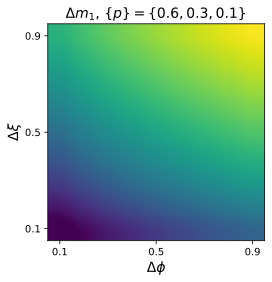

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')

ints_ticks = [int(x) for x in np.linspace(0,8,3)]
xtks = dc_arr[ints_ticks]

plt.figure(figsize=[5,4])
plt.title(r'$\Delta m_1$, $\{ p \} = \{ 0.6,0.3,0.1 \}$',fontsize=14)
plt.imshow(delta_m_1,interpolation='gaussian', vmin = 0.35, vmax=0.95, origin='lower')
plt.xlabel(r'$\Delta \phi$',fontsize=14)
plt.xticks(ints_ticks,xtks)
plt.ylabel(r'$\Delta \xi$',fontsize=14)
plt.yticks(ints_ticks,xtks)
#plt.colorbar()
#plt.savefig('delta_m_1.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

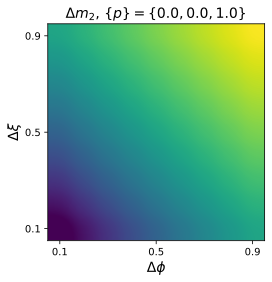

In [18]:
# {p} = {0 , 0 ,1} fully mixed
plt.figure(figsize=[4,4])
plt.title(r'$\Delta m_2$, $\{ p \} = \{ 0.0,0.0,1.0 \}$',fontsize=14)
plt.imshow(delta_m_2,interpolation='gaussian', vmin = 0.35, vmax=0.95, origin='lower')
plt.xlabel(r'$\Delta \phi$',fontsize=14)
plt.xticks(ints_ticks,xtks)
plt.ylabel(r'$\Delta \xi$',fontsize=14)
plt.yticks(ints_ticks,xtks)
#plt.colorbar()
plt.savefig('delta_m_2.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

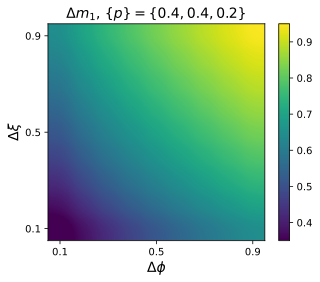

In [42]:
ints_ticks = [int(x) for x in np.linspace(0,8,3)]
xtks = dc_arr[ints_ticks]

plt.figure(figsize=[5,4])
plt.title(r'$\Delta m_1$, $\{ p \} = \{ 0.4,0.4,0.2 \}$',fontsize=14)
plt.imshow(delta_m_1,interpolation='gaussian', vmin = 0.35, vmax=0.95, origin='lower')
plt.xlabel(r'$\Delta \phi$',fontsize=14)
plt.xticks(ints_ticks,xtks)
plt.ylabel(r'$\Delta \xi$',fontsize=14)
plt.yticks(ints_ticks,xtks)
plt.colorbar()
plt.savefig('color_bar.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

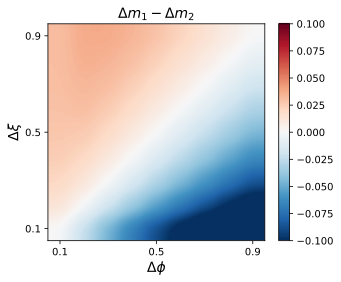

In [23]:
##Compute similairty between two matrices
diff_mat = delta_m_1 - delta_m_2
plt.figure(figsize=[5,4])
plt.title(r'$\Delta m_1 - \Delta m_2$',fontsize=14)
plt.imshow(diff_mat, interpolation='gaussian', origin='lower', cmap='RdBu_r', vmin=-0.10, vmax=0.10)
plt.xlabel(r'$\Delta \phi$',fontsize=14)
plt.ylabel(r'$\Delta \xi$',fontsize=14)
plt.xticks(ints_ticks,xtks)
plt.yticks(ints_ticks,xtks)
plt.colorbar()
plt.savefig('difference_delta_m.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

## 2. Matrix and histogram for unimodal vs. multimodal

In [19]:
from scipy.stats import norm
from scipy import integrate

def function_H(T):
    return 1-norm.cdf(T)

def function_in_G(h,x,T):
    
    return np.exp(-h**2/2)*function_H( ((1-x)*h-T) / np.sqrt(x*(2-x)) )/np.sqrt(2*np.pi)

def function_G(delta_s,f,T):
    
    Int_res, err = integrate.quad(function_in_G,T,np.inf,args=(delta_s,T))
    
    return Int_res/(f*(1-f))

## Null Model

In [5]:
import numpy as np

In [147]:
H=2100
P=10
K=10
th=0.8

In [148]:
h=np.random.normal(0,1,size=(P*K,H))

In [149]:
# Fix sparsity
m = h.copy()
m[h>th] = 1
m[h<th] = 0

In [150]:
np.sum(m)/(P*K*H) # check sparsity

0.21194761904761905

In [151]:
dm = function_G(0.1,function_H(0.8),0.8)
print(dm)

0.310458385660571


In [152]:
def flip_matrix(data,noise_parameter):
    flip_vector = np.sign(np.random.rand(data.shape[0],data.shape[1])-noise_parameter/2.)
    return data*flip_vector

In [153]:
m_noise = flip_matrix(m,dm)

cov_null = np.matmul((m-erf1(T)),(m_noise-erf1(T)).T)/H

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

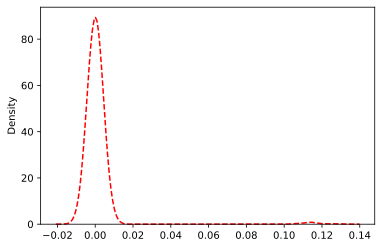

In [42]:
sns.distplot(cov_null.reshape(-1), norm_hist=True, kde_kws={'linestyle':'--'}, hist=False, color='red')

## 2a) Multi-modal case

In [157]:
##Small matrix --> for the covariance display
N=100
H=2100
P=10
K=10
ds=0.1
dc=0.1
th=0.8

p3=0.4
p2=0.1
p1=0.5
f = erf1(th)

o_stats=np.array([])
for i in tqdm(range(10)):
    h_small,h_test_small = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)
    o_small = 0.5*(np.sign(h_small-th)+1) - f
    o_small_test = 0.5*(np.sign(h_test_small-th)+1) - f
    cov_small = (1/H)*np.matmul(o_small.T,o_small_test)
    o1 = cov_small.reshape(-1)
    o_stats=np.concatenate((o_stats,o1))

100%|██████████| 10/10 [00:00<00:00, 35.79it/s]


In [45]:
print(f)

0.21185539858339675


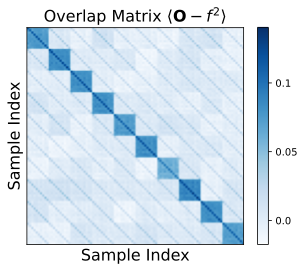

In [75]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Overlap Matrix $\langle\mathbf{O}-f^2\rangle$', fontsize=16)
plt.imshow(cov_small, cmap='Blues')
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("left", size="5%", pad=1.05)
#plt.tight_layout()
cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('multi_cov_m.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


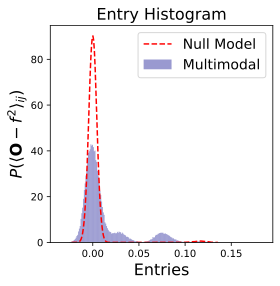

In [159]:
fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram',fontsize=16)
sns.distplot(o_stats, norm_hist=True,bins=200, kde=False, label="Multimodal", color="darkblue")
sns.distplot(cov_null.reshape(-1), norm_hist=True, kde_kws={'linestyle':'--'}, hist=False, color='red', label="Null Model")
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\langle\mathbf{O}-f^2\rangle_{ij})$',fontsize=16)
ax2.legend(fontsize=14)
ax2.set_xlim(-0.046,0.195)
plt.savefig('multi_histogram_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

## 2b) Unimodal case

In [144]:
##Small matrix --> for the covariance display
N=100
H=2100
P=100
K=1
ds=0.1
dc=0.1
th=0.8
f = erf1(th)

p1=1
p2=0
p3=0

o_stats=np.array([])
for i in tqdm(range(10)):
    h_small,h_test_small = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)
    o_small = 0.5*(np.sign(h_small-th)+1) - f
    o_small_test = 0.5*(np.sign(h_test_small-th)+1) - f
    cov_small = (1/H)*np.matmul(o_small.T,o_small_test)
    o1 = cov_small.reshape(-1)
    o_stats=np.concatenate((o_stats,o1))

100%|██████████| 10/10 [00:00<00:00, 21.94it/s]


In [53]:
print(erf1(0.8))
print(f*(1-f)*(1-function_G(0.1,f,th)))

0.21185539858339675
0.1151346172991868


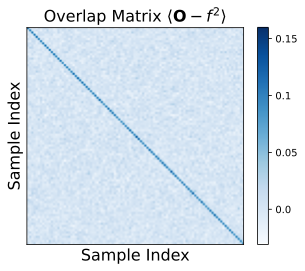

In [82]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Overlap Matrix $\langle\mathbf{O}-f^2\rangle$', fontsize=16)
plt.imshow(cov_small,cmap="Blues")

#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("left", size="5%", pad=1.05)
#plt.tight_layout()
cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('Uni_cov_m.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


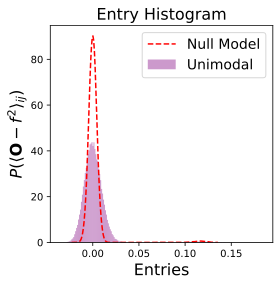

In [156]:
fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram',fontsize=16)
sns.distplot(o_stats, norm_hist=True, bins=200,kde=False,label='Unimodal', color='purple')
sns.distplot(cov_null.reshape(-1), norm_hist=True, kde_kws={'linestyle':'--'}, hist=False, color='red', label="Null Model")
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\langle\mathbf{O}-f^2\rangle_{ij})$',fontsize=16)
ax2.legend(fontsize=14)
ax2.set_xlim(-0.046,0.195)
plt.savefig('Uni_histogram_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121)
ax1.set_title(r'$\mathbf{C}  = (1/N_{c})(\mathbf{m} - f)^{T}(\mathbf{m} - f)$, $f=0.46$')
im1 = ax1.imshow(cov_small,aspect='auto')
ax2 = fig.add_subplot(122)
ax2.set_title(r'Histogram - similarity matrix',fontsize=14)
sns.distplot(o1)
ax2.set_xlabel(r'Entries',fontsize=14)
ax2.set_ylabel(r'$P((m^{\mu}-f) (m^{\nu}-f))$',fontsize=14)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%", pad=1.05)
plt.tight_layout()
plt.colorbar(im1,cax=cax)
plt.savefig('{}/histogram_cov_m_unimodal.png'.format(path_fig),transparent=True,dpi=200,bbox_inches='tight')
plt.show()

# 3. Comparison of gen. error

In [90]:
###THREE SEPARATE CONFIGURATIONS - COMPARE
#Config 1 --> unimodal
N=100
H=2100
P1=1600
K1=1
dstim=0.1
dcont=0.1

p1_1=1
p2_1=0
p3_1=0

#Config 2 (symm) --> {} = {0.3,0.3,0.4}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_2=0.3
p2_2=0.3
p3_2=0.4

#Config 3 (symm) --> {} = {0.,0.,1.0}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_3=0.0
p2_3=0.0
p3_3=1.0

th_list = np.linspace(0,3.1,20)
cods_list = np.zeros(len(th_list))

errs1_theory = np.zeros(len(th_list))
errs1_emps = np.zeros(len(th_list))
errs2_theory = np.zeros(len(th_list))
errs2_emps = np.zeros(len(th_list))
errs3_theory = np.zeros(len(th_list))
errs3_emps = np.zeros(len(th_list))

for i,th in enumerate(th_list):
    print('i is',i)
    err1_theory,err1_emp,d_emp,d_theory = hebbian_mixed_layer_heterogeneous(H,N,P1,K1,th,p1_1,p2_1,p3_1,ds=dstim,dc=dcont)
    err2_theory,err2_emp,d_emp,d_theory = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1_2,p2_2,p3_2,ds=dstim,dc=dcont)
    err3_theory,err3_emp,d_emp,d_theory = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1_3,p2_3,p3_3,ds=dstim,dc=dcont)
    
    errs1_theory[i] = err1_theory
    errs1_emps[i] = err1_emp
    
    errs2_theory[i] = err2_theory
    errs2_emps[i] = err2_emp
    
    errs3_theory[i] = err3_theory
    errs3_emps[i] = err3_emp
    
    cods_list[i] = erf1(th)

i is 0
i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10
i is 11
i is 12
i is 13
i is 14
i is 15
i is 16
i is 17
i is 18
i is 19


In [91]:
##GET UNIMODAL WITH P=1600
from sparseness_expansion import *
N=100
H=2100
P=1600
ds=0.1
for i,th in enumerate(th_list):
    print('i is',i)
    err_mean, err_std, err_theory, cod,f, d_out_mean, d_out_theory = compute_err_and_snr(N,P,H,ds,th)
    errs1_theory[i] = err_theory
    errs1_emps[i] = err_mean

i is 0
i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10
i is 11
i is 12
i is 13
i is 14
i is 15
i is 16
i is 17
i is 18
i is 19


In [92]:
np.savetxt(r'cods_list.txt',cods_list,fmt='%.7f', delimiter=',')
np.savetxt(r'errs_emps.txt',np.vstack((errs1_emps, errs2_emps, errs3_emps)),fmt='%.7f', delimiter=',')
np.savetxt(r'errs_theory.txt',np.vstack((errs1_theory, errs2_theory, errs2_theory)),fmt='%.7f', delimiter=',')

In [49]:
cods_list = np.loadtxt(r'cods_list.txt')
errs_emps = np.loadtxt(r'errs_emps.txt', delimiter=',')
flist_dense = np.loadtxt(r'errs_flistdense.txt')
errs_theory = np.loadtxt(r'errs_theory.txt', delimiter=',')

In [50]:
from IPython import display
display.set_matplotlib_formats('svg')

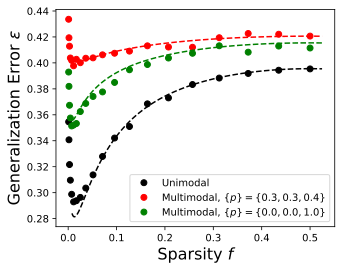

In [51]:
fig = plt.figure(figsize=[5,4])
#plt.title(r'Comparision of generalization error - unimodal vs. umlti-modal')
plt.plot(cods_list,errs_emps[0,:],'o',color='Black',label=r'Unimodal')
plt.plot(flist_dense,errs_theory[0,:],'--',color='Black')
plt.plot(cods_list,errs_emps[1,:],'o',color='Red',label=r'Multimodal, $\{ p \} = \{ 0.3,0.3,0.4 \}$')
plt.plot(flist_dense,errs_theory[1,:],'--',color='Red')
plt.plot(cods_list,errs_emps[2,:],'o',color='Green',label=r'Multimodal, $\{ p \} = \{ 0.0,0.0,1.0 \}$')
plt.plot(flist_dense,errs_theory[2,:],'--',color='Green')
plt.xlabel(r'Sparsity $f$',fontsize=16)
plt.ylabel(r'Generalization Error $\epsilon$',fontsize=16)
plt.legend()
plt.savefig('comparison_error.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

## 4. Comparison of eignevalue spectrum

In [90]:
###THREE SEPARATE CONFIGURATIONS - COMPARE
#Config 1 --> unimodal
N=100
H=2100
P1=1600
K1=1
dstim=0.1
dcont=0.1

p1_1=1
p2_1=0
p3_1=0

#Config 2 (symm) --> {} = {0.3,0.3,0.4}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_2=0.3
p2_2=0.3
p3_2=0.4

#Config 3 (symm) --> {} = {0.,0.,1.0}
N=100
H=2100
P=40
K=40
dstim=0.1
dcont=0.1

p1_3=0.0
p2_3=0.0
p3_3=1.0

In [93]:
###Same 3 configs as above
th = 0.8
f = erf1(th)
h1,h_test1 = generate_hetergeneous(H,N,P1,K1,p1_1,p2_1,p3_1,d_stim=dstim,d_cont=dcont)
o1 = 0.5*(np.sign(h1 - th) + 1) - f
o1_test = 0.5*(np.sign(h_test1 - th) + 1) - f
cov1 = (1/H)*np.matmul(o1.T,o1_test)
eigs1 = LA.eigvals(cov1)

h2,h_test2 = generate_hetergeneous(H,N,P,K,p1_2,p2_2,p3_2,d_stim=dstim,d_cont=dcont)
o2 = 0.5*(np.sign(h2 - th) + 1) - f
o2_test = 0.5*(np.sign(h_test2 - th) + 1) - f
cov2 = (1/H)*np.matmul(o2.T,o2_test)
eigs2 = LA.eigvals(cov2)


h3,h_test3 = generate_hetergeneous(H,N,P,K,p1_3,p2_3,p3_3,d_stim=dstim,d_cont=dcont)
o3 = 0.5*(np.sign(h3 - th) + 1) - f
o3_test = 0.5*(np.sign(h_test3 - th) + 1) - f
cov3 = (1/H)*np.matmul(o3.T,o3_test)
eigs3 = LA.eigvals(cov3)

h_null=np.random.normal(0,1,size=(P*K,H))
m_null = h_null.copy()
m_null[h_null>th] = 1
m_null[h_null<th] = 0
dm = function_G(dstim,f,th)
m_noise = flip_matrix(m_null,dm)
cov_null = np.matmul((m_null-f),(m_noise-f).T)/H
eigs_null = LA.eigvals(cov_null)

In [74]:
from IPython import display
display.set_matplotlib_formats('svg')

/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


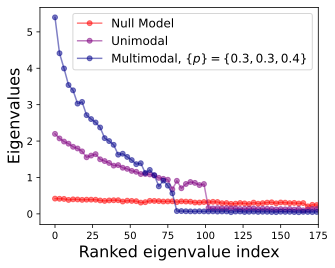

In [143]:

step=3
plt.figure(figsize=[5,4])
#plt.title(r'Comparison of eigenvalue spectrum - unimodal vs. multi-modal',fontsize=14)
plt.plot(np.arange(0,1600,step),eigs_null[::step],'o-',color='red',alpha=0.5,ms=5,label=r'Null Model')
plt.plot(np.arange(0,1600,3),eigs1[::3],'o-',color='purple',alpha=0.5,ms=5,label=r'Unimodal')
plt.plot(np.arange(0,1600,3),eigs2[::3],'o-',color='darkblue', alpha=0.5,ms=5,label=r'Multimodal, $\{ p \} = \{ 0.3,0.3,0.4 \}$')
#plt.plot(np.arange(0,1600,3),eigs3[::3],'o-',color='darkblue', alpha=0.5,ms=5,label=r'Multimodal, $\{ p \} = \{ 0.0,0.0,1.0 \}$')

#plt.axvline(N,linestyle='--',label='$100$')
plt.xlabel(r'Ranked eigenvalue index',fontsize=16)
plt.ylabel(r'Eigenvalues',fontsize=16)
plt.xlim(-10,175)
plt.legend(fontsize=12)
plt.savefig('comparison_eigenvalues.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


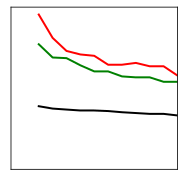

In [77]:
plt.figure(figsize=[3,3])
#plt.title(r'Comparison of eigenvalue spectrum - unimodal vs. multi-modal',fontsize=14)
plt.plot(eigs1,color='black',label=r'Unimodal', lw=2)
plt.plot(eigs2,color='red',label=r'Multimodal, $\{ p \} = \{ 0.3,0.3,0.4 \}$', lw=2)
plt.plot(eigs3,color='green',label=r'Multimodal, $\{ p \} = \{ 0.0,0.0,1.0 \}$', lw=2)
plt.axvline(N,linestyle='--',label='$N=100$', lw=2)
#plt.xlabel(r'Ranked eigenvalue index',fontsize=16)
#plt.ylabel(r'Eigenvalues',fontsize=16)
plt.xlim(-2,10)
#plt.ylim(0,1.5)
plt.xticks([])
plt.yticks([])
#plt.legend()
plt.savefig('comparison_eigenvalues_inner.png',transparent=True,dpi=300,bbox_inches='tight')
plt.show()